In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)



In [6]:
Base.prepare(autoload_with=engine)

C:\Users\ikran\AppData\Local\Temp\ipykernel_48852\357942931.py:1: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  Base.prepare(autoload_with=engine)
C:\Users\ikran\AppData\Local\Temp\ipykernel_48852\357942931.py:1: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  Base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [16]:

# Calculate the date one year from the last date in data set.
a_year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)


Query Date: 2016-08-22


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
last_twelve = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= a_year_ago).\
                    group_by(Measurement.date).all()
last_twelve

[('2016-08-22', 1.052),
 ('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.147142857142

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df=pd.DataFrame(last_twelve , columns=['date', 'prcp'])
date_prcp_df.set_index('date',inplace=True)
date_prcp_df.head

<bound method NDFrame.head of                 prcp
date                
2016-08-22  1.052000
2016-08-23  0.451667
2016-08-24  1.555000
2016-08-25  0.077143
2016-08-26  0.016667
...              ...
2017-08-19  0.030000
2017-08-20  0.005000
2017-08-21  0.193333
2017-08-22  0.166667
2017-08-23  0.132500

[367 rows x 1 columns]>

In [23]:
# Sort the dataframe by date
date_prcp_df.sort_values('date')

,prcp
date,
2016-08-22,1.052000
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


<function matplotlib.pyplot.show(close=None, block=None)>

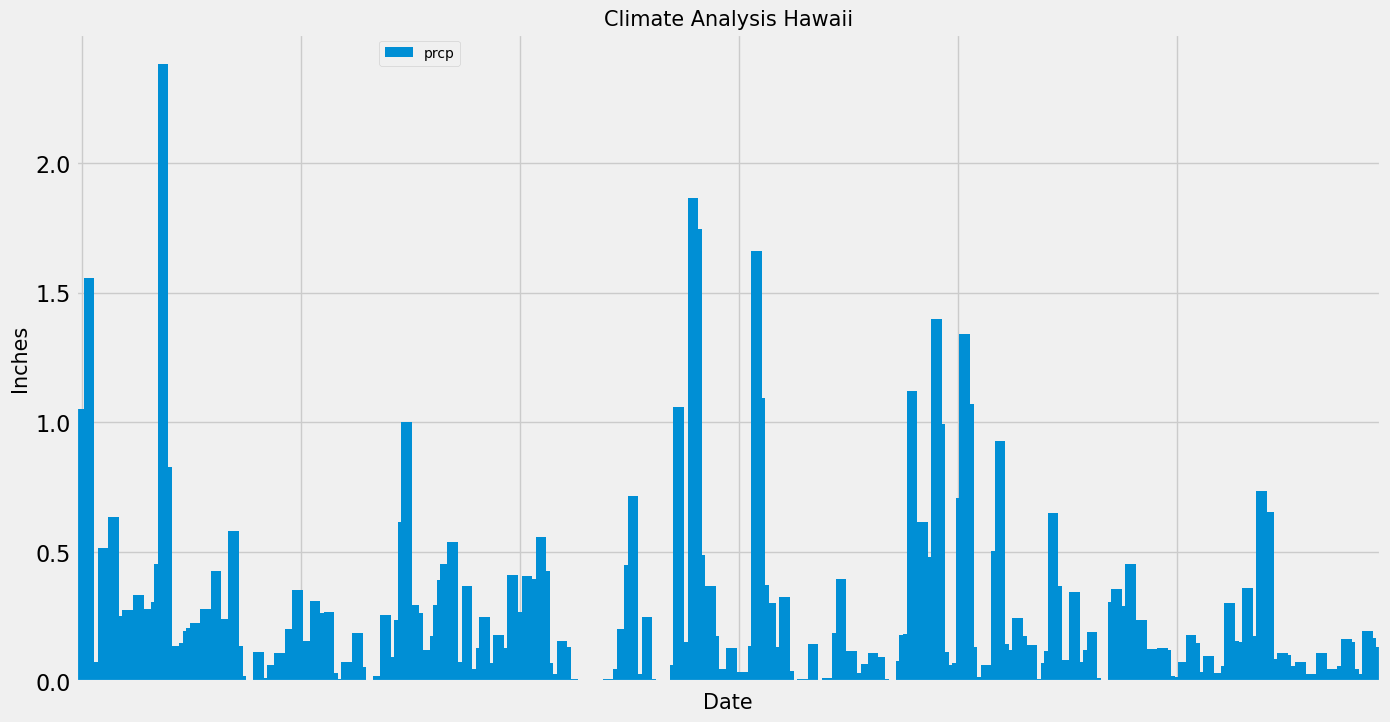

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = date_prcp_df.plot(kind='bar', width=3, figsize=(15,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="10")
plt.title("Climate Analysis Hawaii", size=15)
plt.ylabel("Inches", size=15)
plt.xlabel("Date", size=15)
plt.show

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,prcp
count,367.000000
mean,0.173158
std,0.298841
min,0.000000
25%,0.008571
50%,0.070000
75%,0.192500
max,2.380000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()


9

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = station_activity[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == temps).all()

[(54.0, 71.66378066378067, 85.0)]

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_months_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == temps).\
                filter(Measurement.date >= a_year_ago).all()
tobs_df = pd.DataFrame(last_months_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,78.0
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0


# Close session

In [ ]:
# Close Session
session.close()